In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.model_selection import train_test_split


In [2]:
df=pd.read_csv("test.csv")
dfcopy=df
dfcopy.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NO
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NO
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NO
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NO
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NO
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,NO
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,YES
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,YES
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,NO
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,NO


In [3]:
dfcopy.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [4]:
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 39.3+ KB


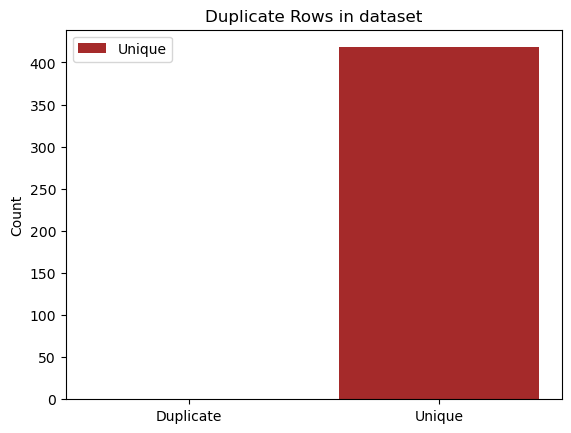

In [5]:
duplicate_counts = dfcopy.duplicated().sum()
unique_counts = dfcopy.drop_duplicates().shape[0]
plt.bar(['Duplicate', 'Unique'], [duplicate_counts, unique_counts],label='Unique',color='brown')
plt.ylabel('Count')
plt.title('Duplicate Rows in dataset')
plt.legend()
plt.show()

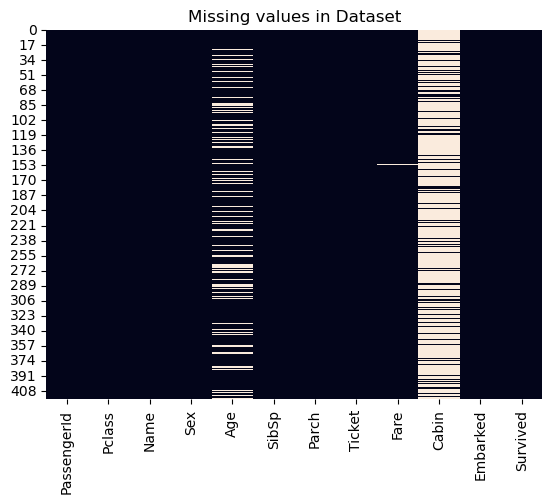

In [6]:
sns.heatmap(dfcopy.isnull(),cbar=False)
plt.title('Missing values in Dataset')
plt.show()

In [7]:
dfcopy=dfcopy.drop('Cabin',axis=1)
dfcopy=dfcopy.drop('Ticket',axis=1)
dfcopy=dfcopy.drop('Name',axis=1)

In [8]:
dfcopy.fillna(dfcopy['Age'].mean(), inplace=True)


PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Survived       0
dtype: int64


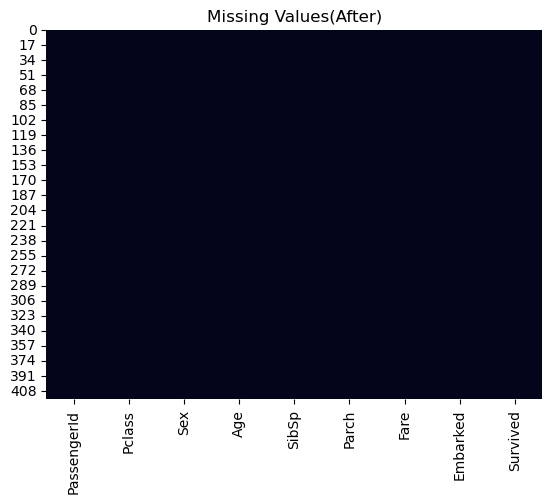

In [9]:
null_counts = dfcopy.isnull().sum()
print(null_counts)

sns.heatmap(dfcopy.isnull(), cbar=False)
plt.title('Missing Values(After)')
plt.show()


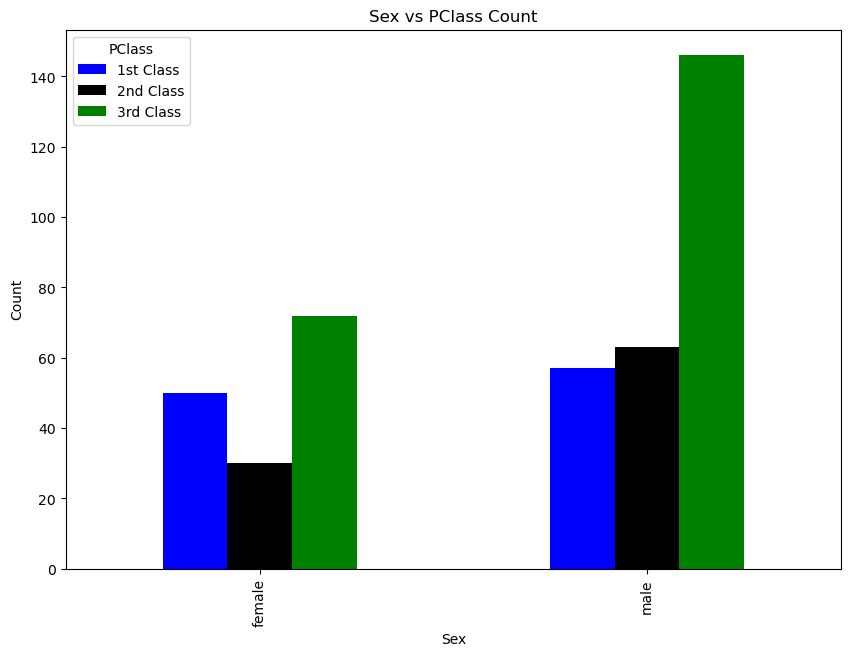

In [10]:
pclass_sex = dfcopy.groupby(['Sex', 'Pclass']).size().unstack()

pclass_sex.plot(kind='bar', color=['blue', 'black', 'green'], figsize=(10, 7))

plt.title('Sex vs PClass Count')
plt.xlabel('Sex')
plt.ylabel('Count')

# Replace numeric labels in the legend with 'Male' and 'Female'
plt.legend(['1st Class', '2nd Class', '3rd Class'], title='PClass')
plt.show()

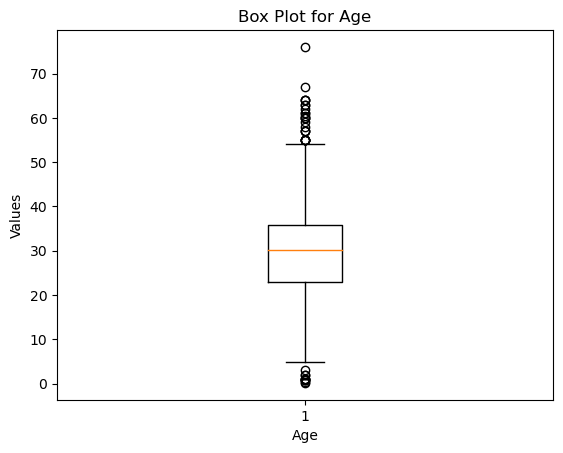

In [11]:
plt.boxplot(dfcopy['Age'])
plt.xlabel('Age')
plt.ylabel('Values')
plt.title('Box Plot for Age')
plt.show()

In [12]:
q1=dfcopy['Age'].quantile(0.25)
q3=dfcopy['Age'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
outliers=dfcopy[(dfcopy['Age']<lower_bound)|(dfcopy['Age']>upper_bound)]
dfcopy = dfcopy[(dfcopy['Age'] >= lower_bound) & (dfcopy['Age'] <= upper_bound)]
print(outliers)

     PassengerId  Pclass     Sex    Age  SibSp  Parch       Fare Embarked  \
2            894       2    male  62.00      0      0    9.68750        Q   
13           905       2    male  63.00      1      0   26.00000        S   
20           912       1    male  55.00      1      0   59.40000        C   
48           940       1  female  60.00      0      0   76.29170        C   
69           961       1  female  60.00      1      4  263.00000        S   
77           969       1  female  55.00      2      0   25.70000        S   
81           973       1    male  67.00      1      0  221.77920        S   
89           981       2    male   2.00      1      1   23.00000        S   
96           988       1  female  76.00      1      0   78.85000        S   
114         1006       1  female  63.00      1      0  221.77920        S   
117         1009       3  female   1.00      1      1   16.70000        S   
142         1034       1    male  61.00      1      3  262.37500        C   

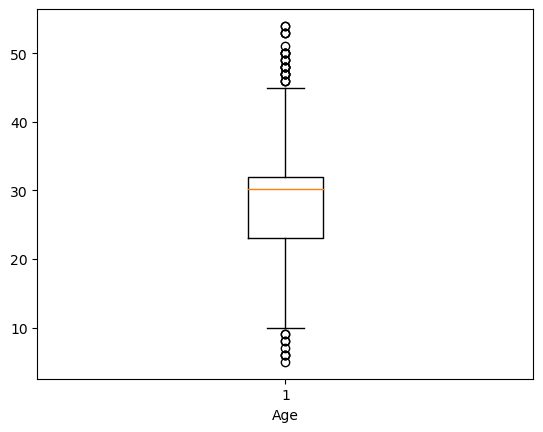

In [13]:
plt.boxplot(dfcopy['Age'])
plt.xlabel('Age')
plt.show()

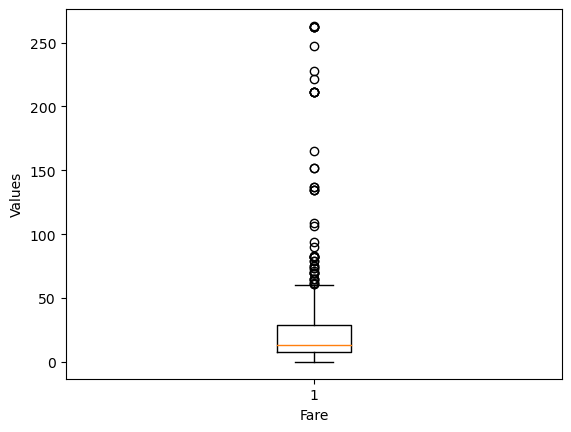

In [14]:
plt.boxplot(dfcopy['Fare'])
plt.xlabel('Fare')
plt.ylabel('Values')
plt.show()

In [15]:
q1 = dfcopy['Fare'].quantile(0.25)
q3 = dfcopy['Fare'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = dfcopy[(dfcopy['Fare'] < lower_bound) | (dfcopy['Fare'] > upper_bound)]
dfcopy = dfcopy[(dfcopy['Fare'] >= lower_bound) & (dfcopy['Fare'] <= upper_bound)]
print(outliers)

     PassengerId  Pclass     Sex       Age  SibSp  Parch      Fare Embarked  \
12           904       1  female  23.00000      1      0   82.2667        S   
14           906       1  female  47.00000      1      0   61.1750        S   
23           915       1    male  21.00000      0      1   61.3792        C   
24           916       1  female  48.00000      1      3  262.3750        C   
26           918       1  female  22.00000      0      1   61.9792        C   
53           945       1  female  28.00000      3      2  263.0000        S   
59           951       1  female  36.00000      0      0  262.3750        C   
64           956       1    male  13.00000      2      2  262.3750        C   
74           966       1  female  35.00000      0      0  211.5000        C   
75           967       1    male  32.50000      0      0  211.5000        C   
118         1010       1    male  36.00000      0      0   75.2417        C   
141         1033       1  female  33.00000      0   

In [16]:
min_val = dfcopy['Fare'].min()
max_val = dfcopy['Fare'].max()
dfcopy['Fare'] = (dfcopy['Fare'] - min_val) / (max_val - min_val)
dfcopy.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,3,male,34.50000,0,0,0.130487,Q,NO
1,893,3,female,47.00000,1,0,0.116667,S,NO
3,895,3,male,27.00000,0,0,0.144375,S,NO
4,896,3,female,22.00000,1,1,0.204792,S,NO
5,897,3,male,14.00000,0,0,0.153750,S,NO
6,898,3,female,30.00000,0,0,0.127153,Q,YES
7,899,2,male,26.00000,1,1,0.483333,S,YES
8,900,3,female,18.00000,0,0,0.120487,C,NO
9,901,3,male,21.00000,2,0,0.402500,S,NO
10,902,3,male,30.27259,0,0,0.131597,S,YES


In [17]:
min_val = dfcopy['Age'].min()
max_val = dfcopy['Age'].max()
dfcopy['Age'] = (dfcopy['Age'] - min_val) / (max_val - min_val)
dfcopy.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,3,male,0.602041,0,0,0.130487,Q,NO
1,893,3,female,0.857143,1,0,0.116667,S,NO
3,895,3,male,0.448980,0,0,0.144375,S,NO
4,896,3,female,0.346939,1,1,0.204792,S,NO
5,897,3,male,0.183673,0,0,0.153750,S,NO
6,898,3,female,0.510204,0,0,0.127153,Q,YES
7,899,2,male,0.428571,1,1,0.483333,S,YES
8,900,3,female,0.265306,0,0,0.120487,C,NO
9,901,3,male,0.326531,2,0,0.402500,S,NO
10,902,3,male,0.515767,0,0,0.131597,S,YES


In [18]:
min_val = dfcopy['Pclass'].min()
max_val = dfcopy['Pclass'].max()
dfcopy['Pclass'] = (dfcopy['Pclass'] - min_val) / (max_val - min_val)
dfcopy.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,1.0,male,0.602041,0,0,0.130487,Q,NO
1,893,1.0,female,0.857143,1,0,0.116667,S,NO
3,895,1.0,male,0.448980,0,0,0.144375,S,NO
4,896,1.0,female,0.346939,1,1,0.204792,S,NO
5,897,1.0,male,0.183673,0,0,0.153750,S,NO
6,898,1.0,female,0.510204,0,0,0.127153,Q,YES
7,899,0.5,male,0.428571,1,1,0.483333,S,YES
8,900,1.0,female,0.265306,0,0,0.120487,C,NO
9,901,1.0,male,0.326531,2,0,0.402500,S,NO
10,902,1.0,male,0.515767,0,0,0.131597,S,YES


In [19]:
min_val = dfcopy['SibSp'].min()
max_val = dfcopy['SibSp'].max()
dfcopy['SibSp'] = (dfcopy['SibSp'] - min_val) / (max_val - min_val)
dfcopy.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,1.0,male,0.602041,0.0,0,0.130487,Q,NO
1,893,1.0,female,0.857143,0.2,0,0.116667,S,NO
3,895,1.0,male,0.448980,0.0,0,0.144375,S,NO
4,896,1.0,female,0.346939,0.2,1,0.204792,S,NO
5,897,1.0,male,0.183673,0.0,0,0.153750,S,NO
6,898,1.0,female,0.510204,0.0,0,0.127153,Q,YES
7,899,0.5,male,0.428571,0.2,1,0.483333,S,YES
8,900,1.0,female,0.265306,0.0,0,0.120487,C,NO
9,901,1.0,male,0.326531,0.4,0,0.402500,S,NO
10,902,1.0,male,0.515767,0.0,0,0.131597,S,YES


In [20]:
min_val = dfcopy['Parch'].min()
max_val = dfcopy['Parch'].max()
dfcopy['Parch'] = (dfcopy['Parch'] - min_val) / (max_val - min_val)
dfcopy.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,1.0,male,0.602041,0.0,0.000000,0.130487,Q,NO
1,893,1.0,female,0.857143,0.2,0.000000,0.116667,S,NO
3,895,1.0,male,0.448980,0.0,0.000000,0.144375,S,NO
4,896,1.0,female,0.346939,0.2,0.166667,0.204792,S,NO
5,897,1.0,male,0.183673,0.0,0.000000,0.153750,S,NO
6,898,1.0,female,0.510204,0.0,0.000000,0.127153,Q,YES
7,899,0.5,male,0.428571,0.2,0.166667,0.483333,S,YES
8,900,1.0,female,0.265306,0.0,0.000000,0.120487,C,NO
9,901,1.0,male,0.326531,0.4,0.000000,0.402500,S,NO
10,902,1.0,male,0.515767,0.0,0.000000,0.131597,S,YES


In [21]:
label_encoder=LabelEncoder()
dfcopy['Sex']=label_encoder.fit_transform(dfcopy['Sex'])
dfcopy.head(10)
#1 for male
#0 for female

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,1.0,1,0.602041,0.0,0.000000,0.130487,Q,NO
1,893,1.0,0,0.857143,0.2,0.000000,0.116667,S,NO
3,895,1.0,1,0.448980,0.0,0.000000,0.144375,S,NO
4,896,1.0,0,0.346939,0.2,0.166667,0.204792,S,NO
5,897,1.0,1,0.183673,0.0,0.000000,0.153750,S,NO
6,898,1.0,0,0.510204,0.0,0.000000,0.127153,Q,YES
7,899,0.5,1,0.428571,0.2,0.166667,0.483333,S,YES
8,900,1.0,0,0.265306,0.0,0.000000,0.120487,C,NO
9,901,1.0,1,0.326531,0.4,0.000000,0.402500,S,NO
10,902,1.0,1,0.515767,0.0,0.000000,0.131597,S,YES


In [22]:
label_encoder=LabelEncoder()
dfcopy['Survived']=label_encoder.fit_transform(dfcopy['Survived'])
dfcopy.head(10)
#0 for no
#1 for yes

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,1.0,1,0.602041,0.0,0.000000,0.130487,Q,0
1,893,1.0,0,0.857143,0.2,0.000000,0.116667,S,0
3,895,1.0,1,0.448980,0.0,0.000000,0.144375,S,0
4,896,1.0,0,0.346939,0.2,0.166667,0.204792,S,0
5,897,1.0,1,0.183673,0.0,0.000000,0.153750,S,0
6,898,1.0,0,0.510204,0.0,0.000000,0.127153,Q,1
7,899,0.5,1,0.428571,0.2,0.166667,0.483333,S,1
8,900,1.0,0,0.265306,0.0,0.000000,0.120487,C,0
9,901,1.0,1,0.326531,0.4,0.000000,0.402500,S,0
10,902,1.0,1,0.515767,0.0,0.000000,0.131597,S,1


In [23]:
label_encoder=LabelEncoder()
dfcopy['Embarked']=label_encoder.fit_transform(dfcopy['Embarked'])
dfcopy.head(10)
#0 for C
#1 for Q
#2 FOR S

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,1.0,1,0.602041,0.0,0.000000,0.130487,1,0
1,893,1.0,0,0.857143,0.2,0.000000,0.116667,2,0
3,895,1.0,1,0.448980,0.0,0.000000,0.144375,2,0
4,896,1.0,0,0.346939,0.2,0.166667,0.204792,2,0
5,897,1.0,1,0.183673,0.0,0.000000,0.153750,2,0
6,898,1.0,0,0.510204,0.0,0.000000,0.127153,1,1
7,899,0.5,1,0.428571,0.2,0.166667,0.483333,2,1
8,900,1.0,0,0.265306,0.0,0.000000,0.120487,0,0
9,901,1.0,1,0.326531,0.4,0.000000,0.402500,2,0
10,902,1.0,1,0.515767,0.0,0.000000,0.131597,2,1


In [28]:
# NOW APPLY ML MODEL (DECISION TREE)
X=dfcopy[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]    #features
y=dfcopy['Survived']     #Target variable

#spliting into training and testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#model initialization and training
classification=DecisionTreeClassifier()
classification.fit(X_train,y_train)


#making predictions
predictions=classification.predict(X_test)

#model evaluation
accuracy=accuracy_score(y_test,predictions)
precision=precision_score(y_test,predictions)
recall=recall_score(y_test,predictions)

print(f'the accuracy of model is: {accuracy}')
print(f'the precision is:{precision}')
print(f'the recall is:{recall}')
   

the accuracy of model is: 0.6119402985074627
the precision is:0.6451612903225806
the recall is:0.5714285714285714


In [29]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NO
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NO
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NO
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NO
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,YES
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,NO
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,NO
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,YES
